# 1. Import Liblary

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import statistics
import scipy.stats

# 2. Import Dataset

In [2]:
# Mengimport data NYC Sales Dataset
nyc_prop = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
# Menampilkan 5 data paling atas
nyc_prop.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# Menampilkan 5 data terakhir
nyc_prop.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
nyc_prop.shape

(84548, 22)

 - Dataset akan dirapikan agar data mudah dapat dianalisis

In [6]:
# info type data di setiap kolom
nyc_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

    Kolom borough berisi kode wilayah yaitu 1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands".

In [7]:
# Mengganti kode dengan nama wilayah pada kolom Borough
nyc_prop['BOROUGH'] = nyc_prop.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
nyc_prop.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# Menghapus kolom 'unnamed:0' karena tidak diketahui deskripsi dari kolom
nyc_prop = nyc_prop.drop(['Unnamed: 0'], axis=1)
nyc_prop.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
# Mengubah type data pada beberapa kolom
nyc_prop['SALE DATE'] = pd.to_datetime(nyc_prop['SALE DATE'], errors='coerce')
nyc_prop['SALE PRICE'] = pd.to_numeric(nyc_prop['SALE PRICE'], errors='coerce')
nyc_prop['LAND SQUARE FEET'] = pd.to_numeric(nyc_prop['LAND SQUARE FEET'], errors='coerce')
nyc_prop['GROSS SQUARE FEET']= pd.to_numeric(nyc_prop['GROSS SQUARE FEET'], errors='coerce')
nyc_prop['TAX CLASS AT TIME OF SALE'] = nyc_prop['TAX CLASS AT TIME OF SALE'].astype('category')
nyc_prop['TAX CLASS AT PRESENT'] = nyc_prop['TAX CLASS AT PRESENT'].astype('category')

In [12]:
nyc_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

# 2.1 Data Cleaning

    Mengecek apakah terdapat missing value atau duplikat pada dataset

In [13]:
# Mendeskripsikan data yang kosong menjadi missing value
nyc_prop.replace(' ', np.nan, inplace = True)

# Mengecek persentase missing value pada setiap kolom dataset
nyc_prop.isna().sum()/len(nyc_prop)*100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: float64

    Karena kolom ['EASE-MENT'] dan ['APARTMENT NUMBER'] memiliki presentase missing value yang besar kolom tersebut akan dihapus. 

In [14]:
# Menghapus kolom 'EASE-MENT' dan 'APARTMENT NUMBER'
nyc_prop.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis = 1, inplace = True)

In [15]:
# Mengecek jumlah missing value pada setiap kolom
nyc_prop.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [16]:
# Mengisi missing value pada kolom 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' dengan nilai mean kolom tsb
nyc_prop['LAND SQUARE FEET'].fillna(nyc_prop['LAND SQUARE FEET'].mean(), inplace=True)
nyc_prop['GROSS SQUARE FEET'].fillna(nyc_prop['GROSS SQUARE FEET'].mean(), inplace=True)

In [17]:
# Menghapus baris yang memiliki missing value
nyc_prop = nyc_prop.dropna()

In [18]:
# Mengecek ulang kolom yang memilik missing value
nyc_prop.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [19]:
# Mengecek data duplikat dari dataset
nyc_prop.duplicated().sum()

380

In [20]:
# Menghapus data duplikat dari dataset
nyc_prop.drop_duplicates(inplace = True)

In [21]:
# Mengecek ulang data duplikat dari dataset
nyc_prop.duplicated().sum()

0

In [22]:
nyc_prop.shape

(68934, 19)

    Dataset sudah dibersihkan dari data duplikat dan missing value. Selanjutnya terdapat 68934 baris dan 19 kolom dataset dapat dianalisis. 

# 3. Analisis Data

In [23]:
# Load data yang sudah dibersihkan 
nyc_prop

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


    Deskripsi statistik nilai disetiap kolom yang memiliki type data integer

In [24]:
nyc_prop.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,6.893400e+04,6.893400e+04,68934.000000,6.893400e+04
mean,4207.065425,365.869905,10799.695636,1.893376,0.165724,2.079424,3.682868e+03,3.707119e+03,1817.367467,1.270954e+06
std,3434.933083,652.366450,987.208476,14.359786,9.041035,17.074241,3.331437e+04,2.434511e+04,491.226548,1.144376e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1356.250000,21.000000,10307.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,1920.000000,2.290000e+05
50%,3390.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.950000e+03,2.400000e+03,1939.000000,5.300000e+05
75%,6191.750000,453.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


## 3.1 Measure of Central Tendency


### 3.1.1 Mean
___
    - Rata-rata total unit, luas tanah, dan harga jual properti di setiap wilayah New York City

In [45]:
# Mean data dari setiap wilayah
nyc_prop.groupby(['BOROUGH'])[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,
Bronx,3.510152,3909.012725,4489.147412,5.946771e+05
Brooklyn,2.227108,2046.266868,2518.944149,8.411462e+05
Manhattan,1.968410,4068.408436,6183.995002,3.314862e+06
Queens,1.669815,3981.478175,3370.405318,7.390223e+05
Staten Islands,1.343693,8016.970839,2631.213176,5.436384e+05


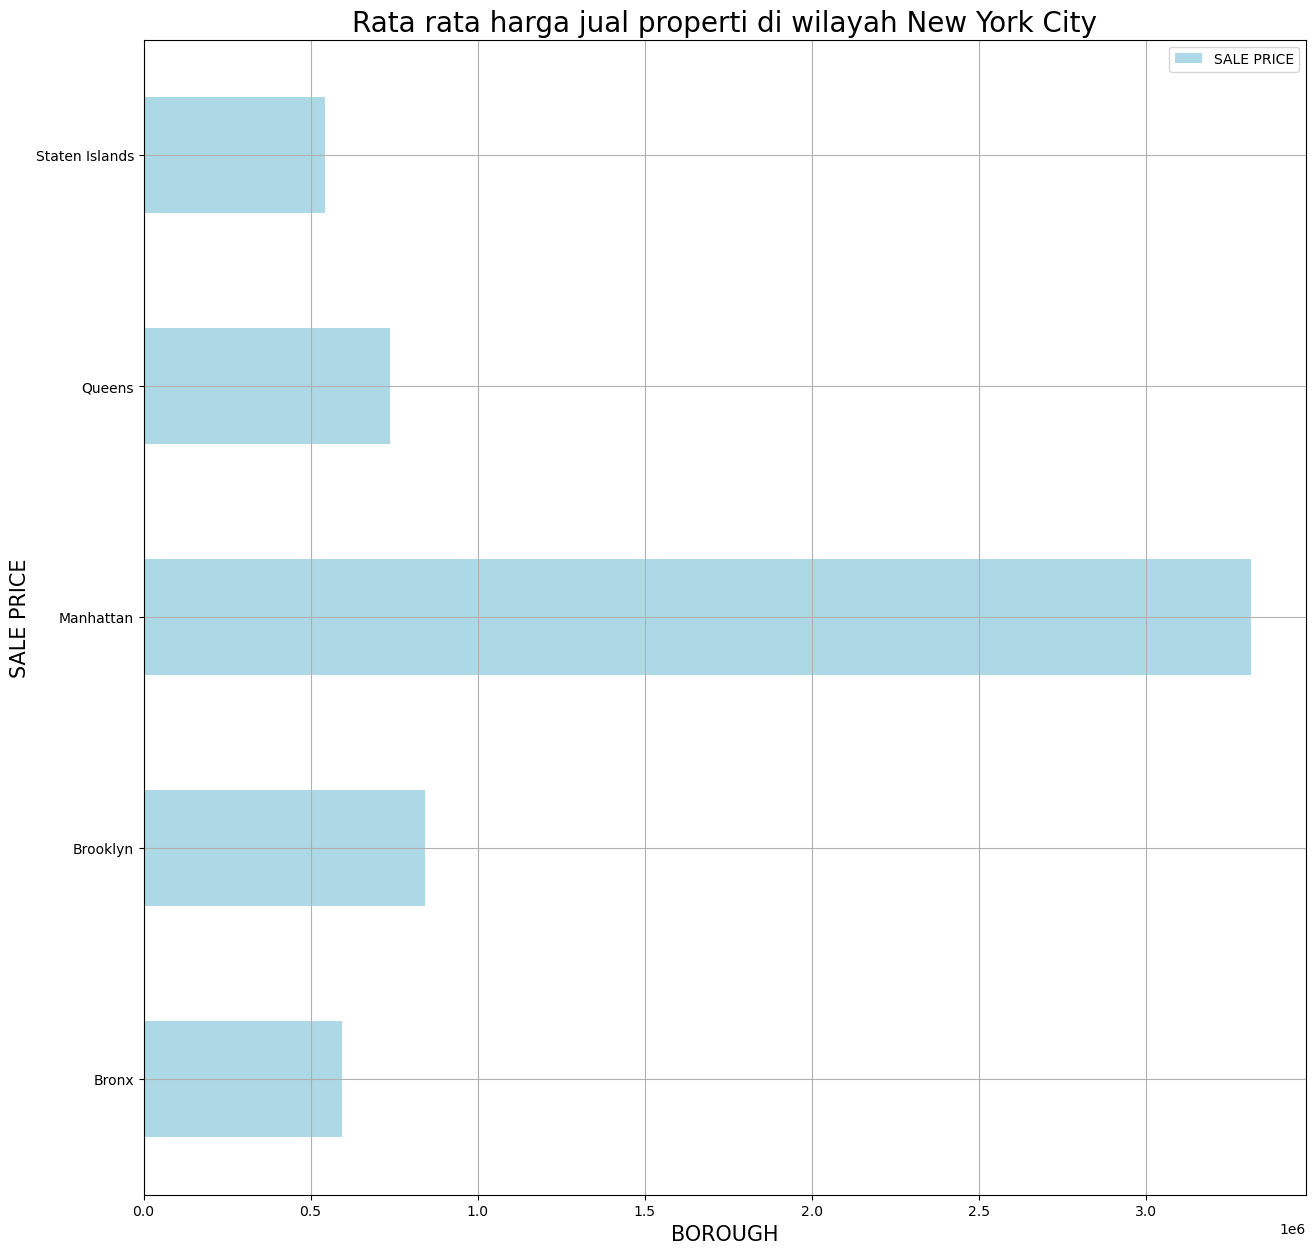

In [117]:
# mean data sale pice setiap wilayah nyc
nyc_mean = nyc_prop.groupby(['BOROUGH'])[['SALE PRICE']].mean()

# Memvisualisasikan rata rata harga jual properti di setiap wilayah dengan barplot
nyc_mean.plot(kind='barh', figsize=(15,15),legend = True, color='lightblue')
plt.title('Rata rata harga jual properti di wilayah New York City', fontsize = 20)
plt.xlabel('BOROUGH', fontsize = 15)
plt.ylabel('SALE PRICE', fontsize = 15)
plt.grid(True)
plt.show()

### 3.1.2 Median
___
    - Perkiraan tahun pembangunan properti yang dijual di wilayah New York City

In [39]:
# Median data tahun pembangunan properti 
nyc_prop.groupby(['BOROUGH'])[['YEAR BUILT']].median()

,YEAR BUILT
BOROUGH,
Bronx,1932.0
Brooklyn,1930.0
Manhattan,1940.0
Queens,1945.0
Staten Islands,1975.0


### 3.1.3 Mode
___
    - Spesifikasi properti yang sering dijual di wilayah New York City

In [28]:
# Modus data yang sering muncul dari dataset penjualan properti di NYC
nyc_prop.groupby(['BOROUGH'])[['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']].apply(pd.DataFrame.mode)

,,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
BOROUGH,,,,,,,
Bronx,0,RIVERDALE,02 TWO FAMILY DWELLINGS,1,D4,1,D4
Brooklyn,0,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,R4,1,R4
Manhattan,0,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,R4,2,R4
Queens,0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,1,D4
Staten Islands,0,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,A5,1,A5


## 3.2 Measure of Spread

### 3.2.1 Range
___
    - Rentang total unit dan harga jual properti di wilayah New York City

In [43]:
# Mengelompokkan data berdasarkan wilayah dengan harga jual properti (otp = peak to peak = max - min )
nyc_prop.groupby(['BOROUGH'])[['TOTAL UNITS','SALE PRICE']].apply(np.ptp)

C:\Users\KARINA\anaconda3\lib\site-packages\numpy\core\_methods.py:276: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\KARINA\anaconda3\lib\site-packages\numpy\core\_methods.py:277: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


,TOTAL UNITS,SALE PRICE
BOROUGH,,
Bronx,955.0,1.100000e+08
Brooklyn,889.0,3.450000e+08
Manhattan,902.0,2.210000e+09
Queens,2261.0,2.575000e+08
Staten Islands,143.0,1.220000e+08


### 3.2.2 Variance
___
    - Varian harga jual properti di setiap wilayah New York City

In [44]:
nyc_prop.groupby(['BOROUGH'])[['SALE PRICE']].var()

,SALE PRICE
BOROUGH,
Bronx,7.803693e+12
Brooklyn,1.583969e+13
Manhattan,5.874848e+14
Queens,1.047003e+13
Staten Islands,3.631702e+12


### 3.2.3 Standart Deviation
---
    - Jarak sebaran data harga jual properti dari rata rata harga jual properti di wilayah New York City

In [34]:
nyc_prop.groupby(['BOROUGH'])[['SALE PRICE']].std()

,SALE PRICE
BOROUGH,
Bronx,2.793509e+06
Brooklyn,3.979911e+06
Manhattan,2.423809e+07
Queens,3.235743e+06
Staten Islands,1.905703e+06


## 3.3 Probability Distribution
---
    - Probabilitas distribusi harga jual properti di wilayah Manhattan, New York City

In [116]:
# Menggunakan Lillefors test untuk mengecek apakah distribusi dari data merupakan distribusi normal
from statsmodels.stats.diagnostic import lilliefors
man_dist = nyc_prop[nyc_prop['BOROUGH'] == 'Manhattan']['SALE PRICE']
man_dist
lilliefors(man_dist)

(0.44560926581571364, 0.0009999999999998899)

Karena dari hasil Lilliefors Test didapatkan hasil P Value lebih kecil dari 0.05 maka dapat diasumsukan bahwa distribusi probabilitas untuk sale price pada wilayah Manhattan bukan merupakan distribusi normal. 

# 3.4 Confidence Intervals
---
    - Intervals kepercayaan proporsi rata rata harga jual dapat mewakili nilai harga properti sesungguhnya di wilayah Manhattan, New York City
    - Nilai kepercayaan 97% 

In [63]:
# Mengelompokkan wilayah berdasarkan data harga jual untuk mean, standart deviasi, dan size
nyc_prop.groupby(['BOROUGH']).agg({'SALE PRICE': [np.mean, np.std, np.size]})

SALE PRICE                     
                        mean           std   size
BOROUGH                                          
Bronx           5.946771e+05  2.793509e+06   6994
Brooklyn        8.411462e+05  3.979911e+06  23491
Manhattan       3.314862e+06  2.423809e+07  14150
Queens          7.390223e+05  3.235743e+06  18314
Staten Islands  5.436384e+05  1.905703e+06   5985

In [67]:
# Rata rata harga properti di Manhattan 
mean_man = 3314862
# Standart deviasi harga properti di Manhattan
std_man = 24238090
# Jumlah properti di Manhattan 
n = 14150
# z-score berdasarkan tabel z
z = 2.17
# standart eror
se = std_man/np.sqrt(n)

In [68]:
# Menghitung CI
# Lower Limit of the CI
low_man = mean_man-z*se

# Lower Limit of the CI
upp_man = mean_man+z*se

# Print hasil CI
print('Lower limit:', low_man)
print('Upper limit:', upp_man)

Lower limit: 2872701.5356473643
Upper limit: 3757022.4643526357


Dari data dapat diperkirakan harga properti paling rendah berkisar 2872701 dan paling tinggi berkisar 3757022

# 3.5 Hypothesis Testing
---
    Significance level (alpha) = 0.05
    mu1 = LAND SQUARE FEET
    mu2 = GROSS SQUARE FEET
    Hipotesis : Menguji korelasi antara mu1 dengan mu2
    - h0 : Variabel Independen
    - h1 = Variabel Dependent

In [171]:
# Menyiapkan data menghapus nilai yang bernilai 0
nyc_sf = nyc_prop[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
nyc_sf.replace(0, np.nan, inplace = True)
nyc_sf.isna().sum()/len(nyc_prop)*100
nyc_sf = nyc_sf.dropna()
nyc_sf

C:\Users\KARINA\AppData\Local\Temp\ipykernel_9048\2810116863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_sf.replace(0, np.nan, inplace = True)


,LAND SQUARE FEET,GROSS SQUARE FEET
0,1633.0,6440.0
3,2272.0,6794.0
4,2369.0,4615.0
6,1750.0,4226.0
9,4489.0,18523.0
...,...,...
84543,2400.0,2575.0
84544,2498.0,2377.0
84545,4000.0,1496.0
84546,208033.0,64117.0


In [175]:
from  scipy.stats import chi2_contingency

# chi-squared test between two categorical variabels
stat, p, dof, expected = chi2_contingency(nyc_sf)

# Deskripsi p value
alpha = 0.05
print('p value is ' + str(p))
if 0 <= alpha:
    print('Dependent (reject h0)')
else:
    print('Independent (h0 holds true)')

p value is 0.0
Dependent (reject h0)


# 4. Overall Analysis

- Kesimpulan dari analisis dataset penjualan properti di New York City
    1. Rata rata TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE yang terjual disetiap wilayah berbeda. Harga jual properti tertinggi ada di wilayah Manhattan.
    2. Perkiraan tahun pembangunan properti yang dijual di wilayah New York City kisaran tahun 1950.
    3. Spesifikasi properti yang sering dijual di wilayah New York City adalah dengan BUILDING CLASS CATEGORY 02 TWO FAMILY DWELLINGS, 01 ONE FAMILY DWELLINGS, dan 13 CONDOS - ELEVATOR APARTMENTS. Serta kelas pajak properti berada di kelas 1 dan 2. 
    4. Rentang total unit dan harga jual properti di wilayah New York City paling banyak di wilayah Queens dan paling sedikit di wilayah Stanten Island.
    5. Dari data dapat diperkirakan harga properti paling rendah berkisar 2872701 dan paling tinggi berkisar 3757022
    6. Dari hipotesis korelasi antara LAND SQUARE FEET dan GROSS SQUARE FEET didapatkan hasil bahwa variabel data memiliki korelasi atau kedua variabel merupakan Variabel Dependent. 